# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
    print data.head()
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset\
indices = [345,23,127]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1198,2602,8335,402,3843,303
1,26373,36423,22019,5154,4337,16523
2,21465,7243,10685,880,2386,2749


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
Wholesaling, jobbing, or distributing is the sale of goods or merchandise to retailers; to industrial, commercial, institutional, or other professional business users; or to other wholesalers. Selected samples can be explained as follows:

1. Sample element 0:
    + Establishment possible: small or mid-scale cafe.
    + Considering the purchase cost of the categories in the sample, one can see that the amount spent on readymade(delicatessen) goods is the least and the grocery items is good. Detergent_paper cost has been observed to be greater as washing cafe dishes, etc might use a lot of it.(Mean of Detergent_paper:2881.49). Also the establishment doesnot seem to be using much readymade food and frozen food.(as Delicatessen cost is 303(though mean is 1524.87,303 lies in the first quartile)). However, a lot amount of money goes into grocery. But not much milk(less than mean). Also the fresh items the establishment purchases is considerably less.
    
2. Sample element 1:
    + Establishment possible: another wholesale seller or large-scale cafe.
    + Considering the purchase cost of the categories  again, one can see that the amount on every other product is far more greater than the mean. Also, most of them would lie in the last quartile. So, the possible establishment is another wholesale seller or the market. Also, there is a lot of purchase in the milk, grocery and readymade(delicatessen) section. Thus, it suggests that it maybe a wholesale seller again or the market.

3. Sample element 2:
    + Establishment possible: a retailer or direct seller
    + Making available a lot of food products to the consumer with groceries and good amount of groceries(more than mean). So for the detergent_paper and milk and the readymade food.(Amount spent on all of them is near or greater than the mean). But not many frozen foods. Seems as a perfect choice for a retailer (direct seller to consumers).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
new_data = data.drop("Milk", axis=1)
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,data["Milk"],test_size=0.25,random_state=23)
# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.486559955624


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**The maximum r_square score is the highest for the Detergents_paper label. The score comes out to be 0.8239180 which is quite good. Thus the Detergents_paper label is not very necessary for capturing the trends in the customer as other features do capture the Detergents_paper label quite well. (the r_squared score tells us how similar is the our predictions to the original Detergents_paper values)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

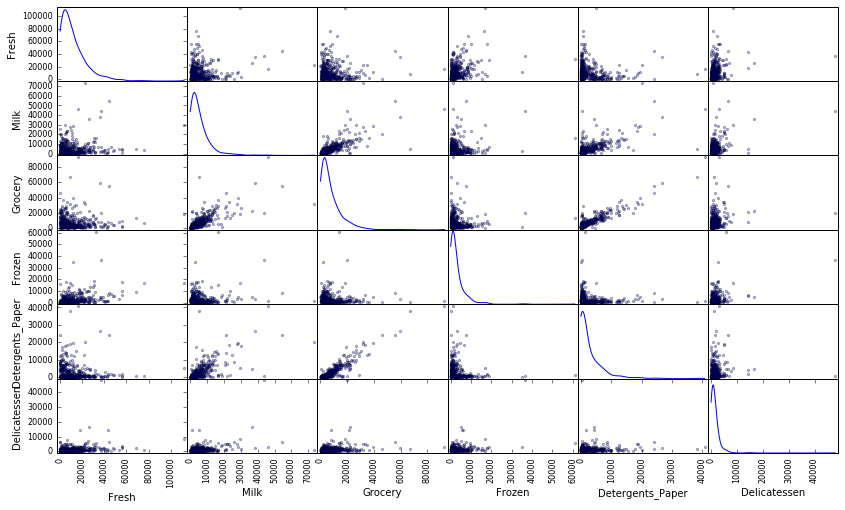

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**Some features exhibiting some degree of correlation are: Detergent_paper, grocery. It can be seen that following graphs show some degree of correlation between them:

1. Detergent_Paper vs Grocery (vice versa too)

Yes, it confirms that the Detergent_Paper amounts are not relevant and can be predicted using other features of the data.
Thus this observation shows that the milk(slightly) and grocery features do capture the Detergents_Paper cost. Some linear observation (sort of x=y line dependency) can be observed in the above graphs. Thus this confirms the suspicion about the Detergent_Paper amounts as they are quite correctly approximated using Milk and Grocery features. 

For other features vs other features, it can be seen that the data is scattered either along the x-axis(close to it) OR the y-axis. This suggests that one feature dominates the other feature and is fairly important for determining that customer. But for graphs listed above, there is some sort of linear relationship which can be fit. It seems that the amount of money one spends on groceries and milk and detergent_paper are related.(May be you buy more detergent to wash dishes when you buy more groceries.).

## Insights from the kde plots and the r_squared score

Detergent_Papers when predicted using other features and r_squared score being measured, we find it to be 0.82, Grocery (0.59) and Milk(0.48655). This indicates that the detergent_paper is the least relevant feature.<br/>
<br/>For the Grocery vs Detergents_Paper graph:
+ Low x-values correspond to low y-values, and high x-values correspond to high y-values. If I put a line through the dots, it would have a positive slope. This scatterplot shows a positive correlation.
+ For other graphs, where there seems to be some correlation but not that strong one.
+ From the graphs, it is clear that the highest linear(somewhat) relationship happens between two of the variables "grocery" and "Detergents_Paper"

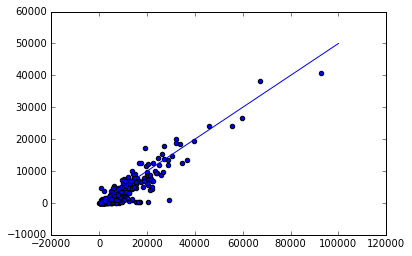

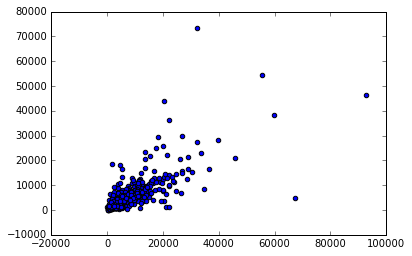

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data['Grocery'], data['Detergents_Paper'])
x = np.arange(100000)
plt.plot(x,0.5*x)
plt.show()
#Thus there can be some linear relationship established between Detergents Paper and Grocery
plt.scatter(data['Grocery'], data['Milk'])
plt.show()
# Data seems to not to be too consistent as the data is skewed.
#(will miss many points which don't lie in the sort of linear relationship)

## Checking skewness of various features

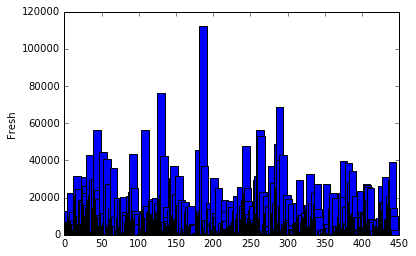

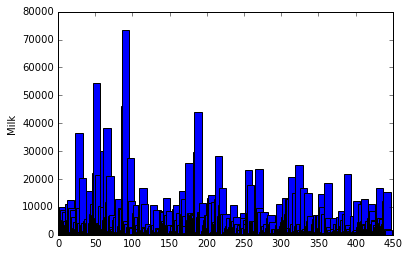

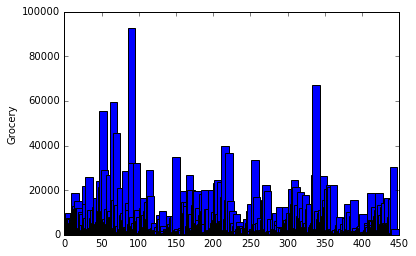

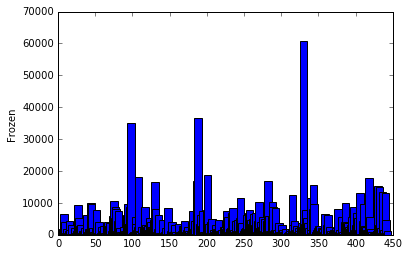

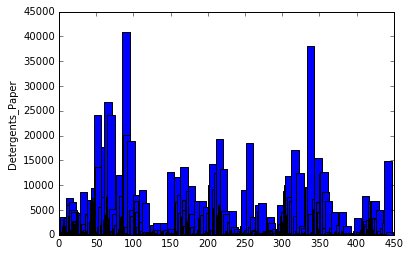

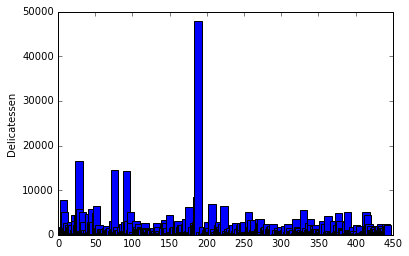

In [8]:
for feature in data.keys():
    plt.bar(np.arange(440, step=1), data[feature],width=10)
    plt.ylabel(feature)
    plt.show()
    

**Fresh**:
+ Data seems to be normally distributed. However, it is slightly positively skewed.
**Milk**:
+ Data is positively skewed. The mode of the data is to the left. The mean lies to the right of the data and so does the median.
**Grocery**
+ It seems to have a bimodal distribution. Two peaks(two modes) can be observed.
**Frozen**
+ The data is negatively skewed. The mode lies far right to the median and the mode.
**Detergents_Powder**
+ This data is also bimodal as the grocery data. Two peaks can be observed and so it is bimodal.
** Delicatessen**
+ This data seems to be normally distributed. However, it is slightly positively skewed.

**Disadvantages of Skewed Data**<br/>
 + Before applying PCA, it is important to remove certain outliers. Plus it is best to have non-skewed data.
 + In most distributions, the mean is easy to find by looking at the middle. The mean is the average of the distribution. However, with a much-skewed distribution, the mean is not necessarily in the middle, making the mean more difficult to find. Many statistical techniques rely on the statistical mean of the distribution, which can make skewed distributions difficult to work with.
 + Extremely skewed distributions can lead to misleading statistics, since the skewed distribution can drive an average up or down.  


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

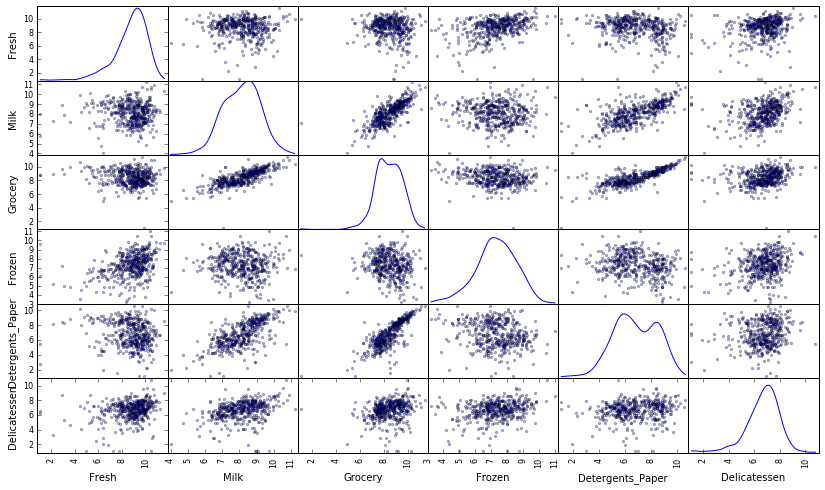

In [40]:
import numpy as np
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [41]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.088409,7.864036,9.028219,5.996452,8.254009,5.713733
1,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
2,9.974179,8.887791,9.276596,6.779922,7.777374,7.918992


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [42]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,154,66, 75, 128,183]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**Yes there are some points that are outliers for more than one feature. For example, the 154th example has outlier cost for Milk, Grocery and Delicatessen.<br/>
These features need to be removed from the dataset. It is so because since they are outliers for multiple features, they affect the whole data and the means of the categories change significantly due to just one example. Thus, removing these outliers in multiple categories will push the mean to a more precise value for these multiple categories.<br/>
Removing some other features like 183rd index since the data seems to obtain very high values for multiple categories. Also, some outliers which are just there for one category might be significant for others categories.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.44703588  0.25997378  0.1224336   0.10212022  0.04785685  0.02057967]
The cumulative variance which can be captured by first n(from 1  to 6) features are:
[  44.7    70.7    82.94   93.15   97.94  100.  ]


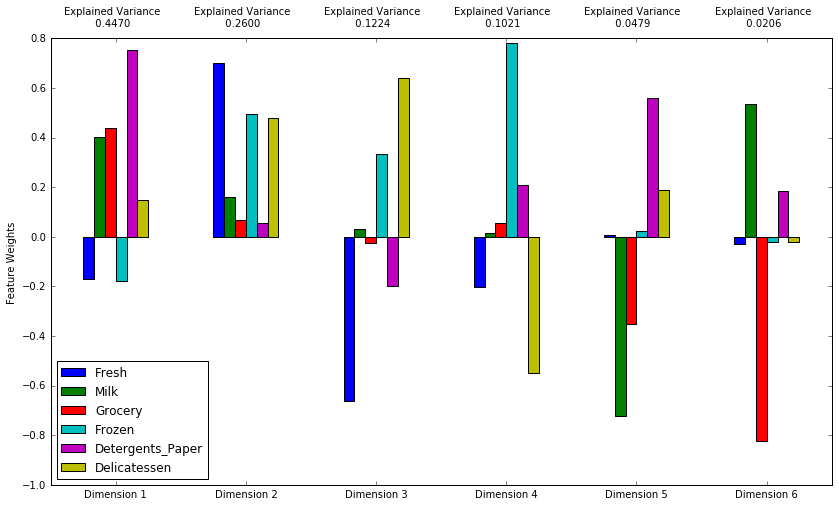

In [43]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
print(pca.explained_variance_ratio_) 

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

# cumulative explained variance 
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print "The cumulative variance which can be captured by first n(from 1  to 6) features are:"
print var1


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** Principal component analysis (PCA) is a mathematical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.<br/>

1. Data explained by the first two principal components is 70.7% cumulatively. The first component captures 44.7% of the variance and the second component captures 25.9% of the variance. 
2. Data explained by the first four principal components is 93.15% cumulatively. The third and the fourth component capture 12.24% and 10.21% of the variance.
3. What the four dimensions best represent in terms of customer spending
    + For the dimension 1, the feature weights for milk, groceries and Detergents_Paper are quite high.(top is Detergents_Paper). Mostly the first dimension would best determine the amount of detergents_paper, grocery and milk. They can be termed as daily needs feature. 
    + For the dimension 2, the feature weights for fresh food is the highest and it captures 26% of the whole data. The fresh food is mainly captured by the second feature. For the dimension 2, the frozen food and the readymade food feature weights are high too. However, these features can be termed as a combination of fresh + frozen + readymade food.
    + For the dimension 3, it can be argued it captures delicatessen(readymade food) more precisely than the dimension 2. This lets us increase our overall capture by 12.2%. 
    + For the dimension 4, it can be argued that it captures the frozen food feature more precisely than the dimension 3 and dimension 2. Thus the feature weights give us a measure of how the dimension weights a specific feature.
    
Thus, as observed previously, the features Milk, grocery and Detergents_paper are quite related and are captured by the first dimension well. For the other dimensions, it is mainly capturing the features fresh, frozen and delicatessen. The last two dimensions weakly again capture the detergents_feature, grocery and milk features.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [44]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.6142,-2.2138,-0.2615,0.1687,0.5741,-0.2428
1,2.7995,3.6299,1.1342,-0.5325,-0.7727,0.1706
2,1.4735,1.4096,-0.3809,-1.0786,-0.0663,-0.1316


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [47]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [48]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))



,Dimension 1,Dimension 2
0,1.6142,-2.2138
1,2.7995,3.6299
2,1.4735,1.4096


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

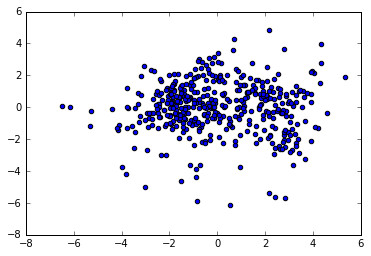

In [49]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])
plt.show()


**Answer:**Main advantages of Gaussian Mixture Model Clustering:
    
+ well-studied statistical inference techniques available: The model-based approach, consists of using certain models for clusters and attempting to optimize the fit between the data and the model. Thus after gaussian mixture clustering, we would have distributions for the clusters and well-studied statistical inference techniques. Thus we can further infer things and understand the data well.
    
+ obtain a density estimation for each cluster
    
+ a “soft” classification is available: datapoints may be suitable to be path of multiple clusters. In those cases the KMeans clustering algorithm will choose and put that point in one of the clusters.

Disadvantages of Gaussian Mixture Clustering:
+ Slow convergence in some cases.

Main advantges of KMeans Clustering:

+ With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).(hierarchical clustering invloves assuming no. of clusters same as the datapoints and then reducing clusters by merging the closest clusers). 

+ K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

Disadvantages of KMeans Clustering:
+ No 'soft' clustering: There may be some points which may share multiple clusters. However, kmeans doesnot care and pushes them into one of the clusters.
+ Fixed number of clusters can make it difficult to predict what K should be. 
+ Does not work well with non-globular clusters.
+ Kmeans may not work well with unevenly sized clusters

Choosing a clustering algorithm:

Some points to consider are as follows:
+ Our data when plotted using plt.scatter and the reduced_data doesnot produce very distict globular clusters. 
+ Also, many of our customers could be jointly part of both cluters and thus it is important to identify them for the wholesale seller.
+ In the data, there seems to be unevenly sized clusters. Thus using Kmeans might not be a good choice.

Considering these points, expectation maximaization seems to be a reasonable algorithm for finding clusters in this case.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [50]:
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2,random_state=10)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print score

0.415451910477


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**<br/>
No.      Score<br/>
2 0.415451910477<br/>
3 0.394082365627<br/>
4 0.345280979105<br/>
5 0.2851647212<br/>
6 0.26123501533<br/>
7 0.310955992785<br/>
8 0.333134926484<br/>
9 0.301687267276<br/>
10 0.333538623666<br/>
11 0.291493467758<br/>
12 0.283762634079<br/>
13 0.272025184662<br/>
14 0.2326322676<br/>
15 0.217461360929<br/>
16 0.213352905288<br/>
17 0.196412969617<br/>
18 0.160671567105<br/>
19 0.197589605165<br/>

The best silhouette score is highest for number of clusters = 2.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

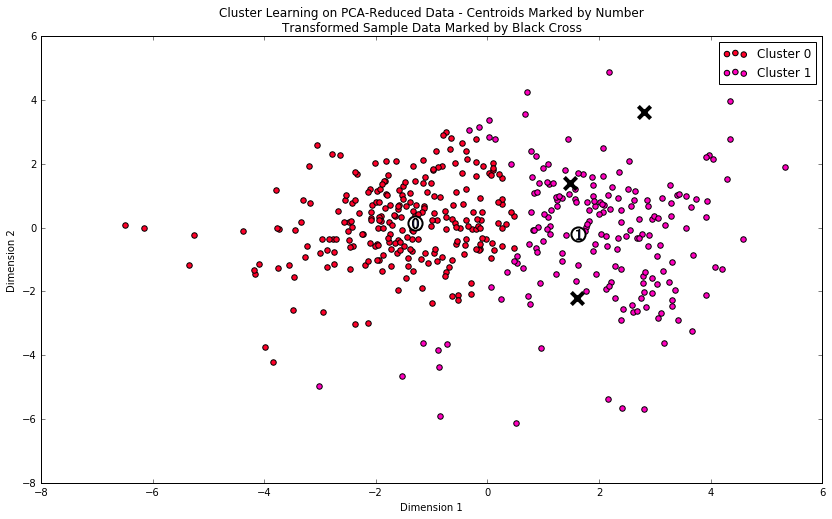

In [51]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [64]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8876,2061,2706,2053,344,713
Segment 1,4231,6245,9436,1021,3005,925


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
+ Segment 0 seems to be a mini or mid scale cafe: Requiring considerable amount of Milk, grocery, fresh food and detergent powder. Also the less amount of delicatessen and frozen food indicates that food is being made at the cafe. Plus the large amout of fresh materials indicates a cafe or hotel.
    + Let us try and get some reasoning:
        + For segment 0, fresh food expenditure mean is 12000. While the fresh food value for segment 0 is 8846. This might explain that in terms of the fresh food, the cluster size is extending big size(the median of fresh food data is 8504.0). However. for other features the cluster has datapoints(customers) spending quite less on milk, grocery, frozen food and others. One can see from the graph (which shows bar graph for cluster mean values and median(50%) values for the data) that the segment 0 will be much capturing a cluster of all those customers that spend less on frozen and ready made food and are more concerned about the fresh foods. Thus this segment is largely spending on fresh food rather than other food categories(all others are below median)

+ Segment 1 seems to be a food-retailer: Spending and presenting the end-consumer with fresh food, milk products, grocery, frozen etc. Spending less on other materials of the retail shop like frozen and readymade food, the retailer is a consumer taking good amounts of fresh, milk and grocery products for selling.
    + Let us try and get some reasoning:
        + For segment 1, amount spent on grocery is greater than the median of the data. Thus this cluster largely captures the customers spending largely on grocery items and milk. The amount spent on detergents_paper is also quite higher than the median of the data. Thus this segment captures more customers interested in grocery and milk. Thus this suggests a segment such as retailer.


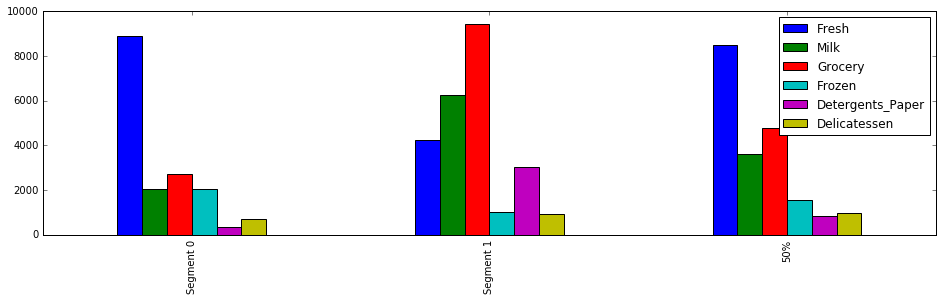

In [65]:
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1198,2602,8335,402,3843,303
1,26373,36423,22019,5154,4337,16523
2,21465,7243,10685,880,2386,2749


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8876,2061,2706.0,2053,344.0,713.0
Segment 1,4231,6245,9436.0,1021,3005.0,925.0
50%,8504,3627,4755.5,1526,816.5,965.5


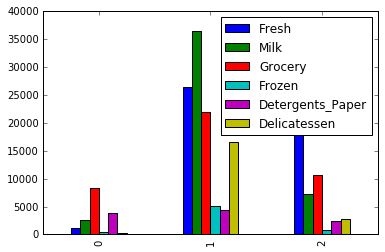

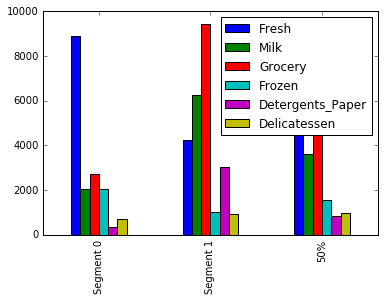

In [69]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
display(samples)
samples.plot(kind='bar')
display(true_centers)
true_centers.plot(kind='bar')

**Answer:**Let us consider the samples:
+ Sample 0:
    + The amount spent on grocery is higher than any other category. Plus the detergents_paper bar is higher similar to the segment 1. Thus, this sample was clustered in segment 1. However, in ques 2, it seemed to my intuition that it must be a small cafe.
+ Sample 1:
    + The amount of money spent on milk is highest. The amount is also greater for fresh products and grocery. Thus as stated in question 2, this sample seems to be a good choice for another retailer or wholesale market or a large scale hotel. Our cluser puts it in the segment 1 which seems a fairly good choice.
+ Sample 2:
    + The amount of money spent on fresh food is the highest. Also, for milk and grocery, the amount is quite high. More or less, putting it into the segment 1 is a good choice as the amount spent on grocery and milk are higher than median.(especially for detergent_paper and grocery)

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**It could affect the zeroth segment the most. They are the most buyers of fresh products. So it would be advantageous for a hotel/cafe to get fresh products and fresh milk to present it to the customers. However, for a retailer, they seem to buy significantly other material than fresh things. Also they buy those things in a fairly large amount. Thus, changing delivery time to 3 days won't matter much for this segment. 

Let us run a step by step A/B test:

+ **Ask a question**: Which customers will be benifited the most and may increase purchase if the delivery service is brought down from 5 days to 3 days?
+ **Background Research**: We have seen and observed trends of people in purchasing. Some tend to buy more fresh food. However, some purchase more storage food like groceries and detergent_paper and milk. Thus we can see two segments of customers with the wholesaler.
+ **Construct a Hypothesis**: As we can see that delivery of fresh products would be advangtageous for a segment of customers that do prefer buying much fresh products. Thus establishments like Hotels, restaurants and cafes are customers that may be benifited by the delivery time. Thus, the wholesaler must choose these sort of customers for testing.
+ **Calculate time or no of visitors to run test on**: The wholesaler might select few customers and recalculate his expenses in decreasing the delivery cost to 3 days. He/She might select few relevant customers, both large scale(like Hotels) and small scale(like Cafes) and decrease their delivery time according to his convinience. He/She need not run the test on all the customers of the segment.<br/>**Important**: One should divide the customer segment into two sub segments of the having approximately the same properties. Then he should give the change(the single variable change) to one set(the treatment set) and doesnot give the change to the other test set(the control set).
+ **Test the hypothesis**: The wholesaler can then test how relevant or profitable did it seem to decrease delivery time for our test set. He/She may then decide whether he/she should keep the decision or discard it.<br/>**Important**: He/She should apply the A/B test to both segments making subsegments for control and treatment. And then measure if the treatment set for one segment yeilded more profit than the other one.
+ **Analyse data and draw conclusions**: He/She may then decide whether he/she should keep the decision or discard it.
+ **Report conclusions to all concerned.**<br/>

**How will improvement, if any actually be proved?**<br/>
It can actually be proved by observation on the control and the treatment set. Since the test is carried out for both the segments, it will yeild if one segment gets affected more than another as well as how much the improvement, if any, is due to that change of a single variable like delivery time. The wholesaler may observe and proclaim that he/she is earning more from one set( the treatment set) than the control set for that segment. Then he can apply and implement the reduced delivery time for the whole segment population.



### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**Based on the present feature list, the wholesaler can use supervised learning to predict sales about a product category only: Maybe sale of utensils. Since the present features incorporate most information about trend of the purchasing of the customers. 
Using the present structure of the data:
1. after analysis, one could see from the two cluster means that the purchasing info divides establishment into cafes or retailers. Also focus on purchasing of food has been made a lot.


Thus, this structure of the analysis can help determine the amount a customer can spend on the utensils. (food and utensils are closely related, a food retailer might not be as interested in utensils as much a cafe or hotel might be).<br/>
It can be said that some feature closely related to the food purchasing can be well predicted by running a supervised learning.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

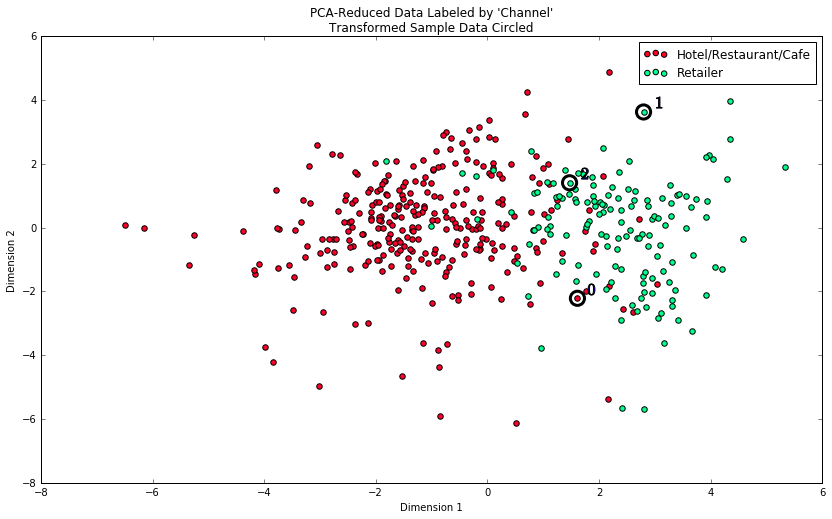

In [110]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**It does quite similar to this underlying distributions of Hotel/Restaurant/Cafe customers vs Retail Customers. However, there are many exceptions too.<br/>
+ In above distribution, there are not very clear clusters that would purely classify customers into retailers, hotel/restaurants/cafes. There are large scale hotels as well as retailers falling into their opposite clusters. Maybe the channel of being a hotel dominates and one ends up in the retailer cluster. Yes, more or less these classifications are consistent with the previous defination of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.